# Assignment 1

Customer Churn Prediction using Random Forest 

City Colleges

Higher Diploma in Data Analytics Applied Machine Learning

20%

## 1.Objective 

Your task is to analyse a real-world dataset and use Random Forest to predict customer churn (whether a customer will leave or stay). 

You will also need to interpret feature importance and give insights for a business strategy.

## 2.Dataset 
Find a Customer Churn Dataset online. 

You may use datasets from: 

• Kaggle (e.g., Telco Customer Churn Dataset) 

• UCI Machine Learning Repository

In [782]:
# https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?resource=download

## 3 Data Exploration and Cleaning 

• Identify missing values and handle them. 

• Perform exploratory data analysis with visualizations. 

• Identify the most relevant features that influence churn. 

• Handle categorical variables (e.g., encoding, one-hot encoding). 

• Scale numerical features if necessary.

#### Step 1. Identify missing values and handle them

In [896]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('bank.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [917]:
dataset = dataset.dropna()
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### Step 2.Perform exploratory data analysis with visualizations

In [990]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


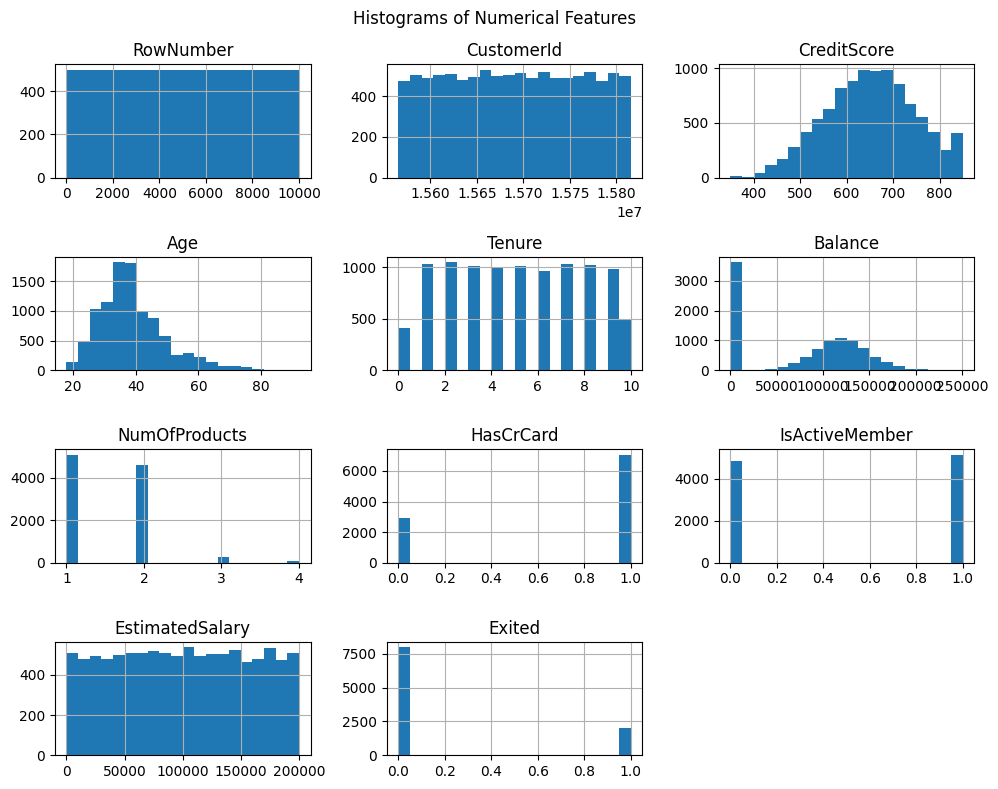

In [919]:
# Histogram

dataset.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

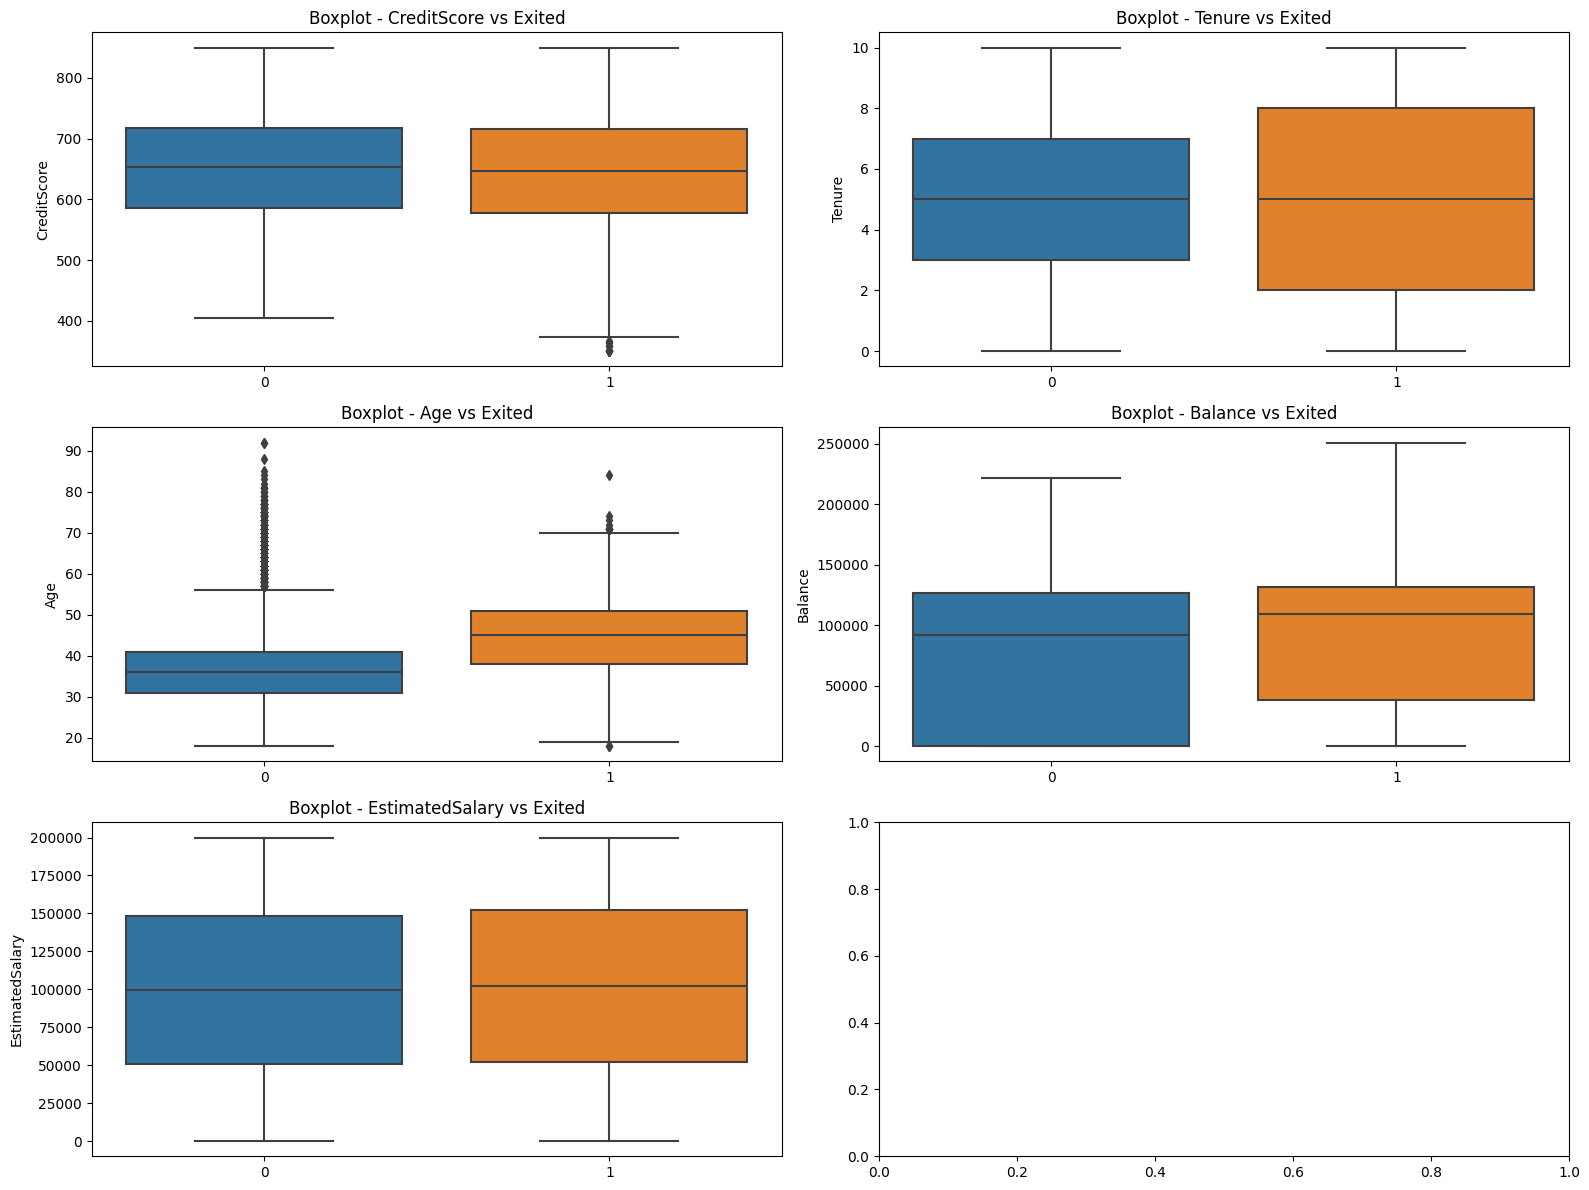

In [1087]:
import matplotlib.pyplot as plt
import seaborn as sns

VariableOfInterest = dataset[["CreditScore","Tenure", "Age", "Balance", "EstimatedSalary", "Exited",]]

num_vars = len(VariableOfInterest.columns)

fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, var in enumerate(VariableOfInterest.columns):
    if var != 'Exited':
        sns.boxplot(x='Exited', y=var, data=VariableOfInterest, ax=axes[i])
        axes[i].set_title(f"Boxplot - {var} vs Exited")
        axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

#### Step 3. Identify the most relevant features that influence churn.

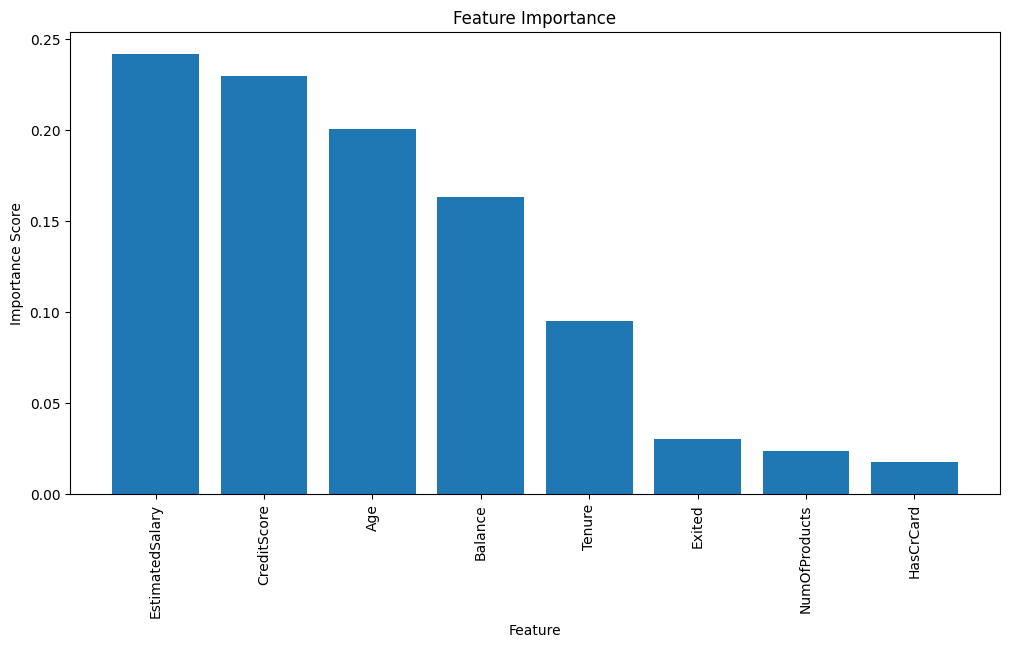

In [996]:
from sklearn.ensemble import RandomForestClassifier

# Feature importances
X = dataset.drop(columns=['IsActiveMember',"Gender","RowNumber","CustomerId","Surname","Geography"])
y = dataset['IsActiveMember']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

#### Step 4. Handle categorical variables (e.g., encoding, one-hot encoding).

In [1095]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

df = pd.DataFrame(dataset)

# Gender
one_hot_encoded_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
# HasCrCard
one_hot_encoded_HasCrCard = pd.get_dummies(df['HasCrCard'], prefix='HasCrCard')

# Converting
one_hot_encoded_Gender = one_hot_encoded_Gender.astype(int)
one_hot_encoded_HasCrCard = one_hot_encoded_HasCrCard.astype(int)

# Concat
df_encoded = pd.concat([df, one_hot_encoded_Gender, one_hot_encoded_HasCrCard, one_hot_encoded_IsActiveMember], axis=1)
df_encoded

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,1,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,0,1,1,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1,0,1,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,1,0


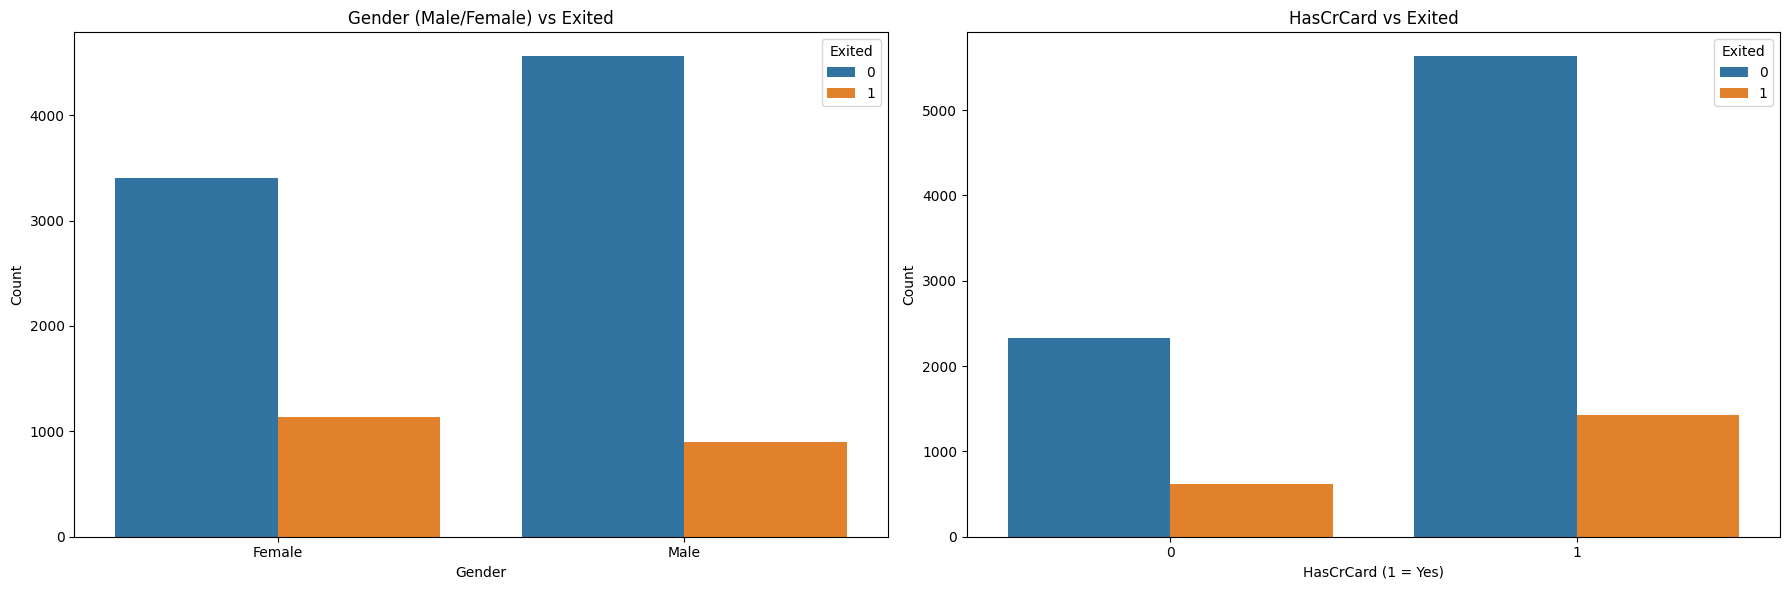

In [1093]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.concat([df, one_hot_encoded_Gender, one_hot_encoded_HasCrCard], axis=1)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Gender
sns.countplot(x='Gender', hue='Exited', data=df_encoded, ax=axes[0])
axes[0].set_title('Gender (Male/Female) vs Exited')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# 2. HasCrCard
sns.countplot(x='HasCrCard_1', hue='Exited', data=df_encoded, ax=axes[1])
axes[1].set_title('HasCrCard vs Exited')
axes[1].set_xlabel('HasCrCard (1 = Yes)')
axes[1].set_ylabel('Count')

# layout
plt.tight_layout()
plt.show()

## 4 Train a Random Forest Model 

• Split the data into training and testing sets. 

• Train a Random Forest classifier to predict churn. 

• Tune hyperparameters for better performance.

#### Step 1. Split the data into training and testing sets

In [1043]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = df_encoded.select_dtypes(include=[np.number]).drop(columns=['Exited'])
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 2. Train a Random Forest classifier to predict churn

In [1045]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1047]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification report:\n", report)

Accuracy: 85.60%
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.74      0.41      0.53       393

    accuracy                           0.86      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.86      0.84      2000



#### Step 3. Tune hyperparameters for better performance

In [1059]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model,param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=1)
grid_search.fit(X_train, y_train)

print("The Besy Parameters are:", grid_search.best_params_)
print("The Best Accuracy score is:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict (X_test)

accuracy= accuracy_score(y_test, y_pred)
print("The accuracy is: ", accuracy)

#30min

The Besy Parameters are: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
The Best Accuracy score is: 0.8563750000000001
The accuracy is:  0.858


In [1061]:
model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification report:\n", report)

Accuracy: 85.80%
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.41      0.53       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



## 5 Model Evaluation 

• Evaluate accuracy, precision, recall, and F1-score. 

• Draw AUC-ROC Curves and inteprate them.

#### Step 1. Evaluate accuracy, precision, recall, and F1-score.

In [1077]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np

from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import classification_report, roc_auc_score 
from sklearn.metrics import roc_curve 

import seaborn as sns

print("\Classification Report")
print(report)

\Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.41      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [1079]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test) [:,1] #estimating probability for class 1

accuracy = accuracy_score (y_test, y_pred) 
confusion_matrix = confusion_matrix(y_test, y_pred) 
report= classification_report(y_test, y_pred) 
auc_score = roc_auc_score(y_test, y_prob)

print(f"Logistic Regression model accuracy is {accuracy*100:2f}%")
print("\Confunsion matrix")

print(confusion_matrix)

Logistic Regression model accuracy is 86.000000%
\Confunsion matrix
[[1558   49]
 [ 231  162]]


#### Step 2. Draw AUC-ROC Curves and inteprate them

AUC score: 0.86


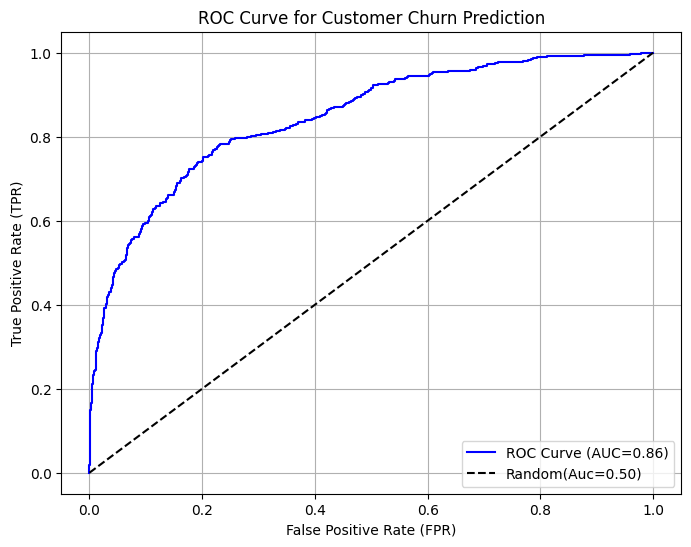

In [1081]:
print(f"AUC score: {accuracy:.2f}")

# roc curve 
fpr, tpr, _ = roc_curve(y_test, y_prob) 
plt.figure(figsize=(8,6)) 
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={accuracy:.2f})',color='blue')
plt.plot([0,1],[0,1],'k--',label = "Random(Auc=0.50)") # random classifier

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Customer Churn Prediction")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 6 Feature Importance and Business Insights 

• Identify which features most influence churn. 

• Write a short report (150 words) answering the following: 

1. Why are customers leaving?
2. What can the company do to retain them?
3. Any surprising findings from the data?
4. Discuss how the model could be deployed in a real business setting for example in a Customer Relationship Management system.

1. Why are customers leaving? 

The analysis reveals that customer churn is influenced by multiple factors, including age, credit score, account balance, and tenure. Older customers, especially those with high balances but lower credit scores, are more likely to leave. This suggests that financial stability alone is not enough to ensure loyalty—other aspects, such as service quality and customer experience, play a crucial role.

2. What can the company do to retain them? 

To improve retention, the company should implement targeted strategies. Personalized financial products tailored to older customers can increase engagement. Incentives for long-term clients, such as reduced fees or exclusive benefits, may also help. Additionally, loyalty programs for inactive members can encourage continued banking activity. Strengthening customer relationships through proactive support, personalized communication, and financial education can further reduce churn.

3. Any surprising findings from the data? 

One unexpected insight is that having a credit card does not significantly impact churn. Furthermore, high account balances, often associated with financial security, are linked to higher churn rates. This could indicate dissatisfaction with banking services, suggesting that even financially stable customers may leave if they don’t feel valued.

4. Discuss how the model could be deployed in a real business setting for example in a Customer Relationship Management system.

The trained Random Forest model can be integrated into a Customer Relationship Management (CRM) system to predict churn. By identifying at-risk customers early, the company can implement proactive retention strategies, such as personalized offers, targeted engagement, and enhanced customer support. This approach reduces attrition and increases overall satisfaction.

### 7 Submission Deadline 

All assignments must be submitted by 28th March 2025.